In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp
from scipy.optimize import newton, bisect, root_scalar, fixed_point

# **Funciones importantes**

La función de **ajuste_angulo** hace una correción al ángulo calculado de anomalía media, pues este tiene un valor entre $0° \leq x < 360°$. La ecuación que calcula la anomalía media en algún punto excede los 360°, así que esta función lo corrige.

In [8]:
def ajuste_angulo(alpha):
  real_alpha = alpha - np.floor(alpha/(2*np.pi))*2*np.pi
  return real_alpha

In [9]:
a = (6*np.pi)
real_a = ajuste_angulo(a)
print(real_a, 0*np.pi)

0.0 0.0


# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

El área del **segmento circular** está dada por la ecuación:

$$A = \frac{R^{2}}{2}(\theta - sin(\theta))$$

Y el área de un cuarto de circunferencia, sabiendo que el área de la circunferencia completa es de $A = \pi R^{2}$, viene escrita como:

$$A = \frac{\pi R^{2}}{4}$$

Igualando las áreas:

$$\frac{R^{2}}{2}(\theta - sin(\theta)) = \frac{\pi R^{2}}{4}$$

Simplificamos multiplicando por $2$ cada lado y cancelando el $R^{2}$:

$$\theta - sin(\theta) = \frac{\pi}{2}$$

Y pasando $\frac{\pi}{2}$ al otro lado nos queda la ecuación:

$$f(\theta) = \theta - sin(\theta) - \frac{\pi}{2}$$

In [ ]:
x = sp.symbols('x') #variable
f = x - sp.sin(x) - sp.pi/2
fprime = 1 - sp.cos(x)
g = sp.sin(x) + sp.pi/2

fl = sp.lambdify(x, f)
df = sp.lambdify(x, fprime)
gl = sp.lambdify(x, g)

In [ ]:
angle = np.linspace(-7,7,100)
curve = fl(angle)

dicc_function = {'Angulos en radianes': angle, 'Funcion':curve}
circunferencia = pd.DataFrame(dicc_function)
circunferencia

,Angulos en radianes,Funcion
0,-7.000000,-7.913810
1,-6.858586,-7.885211
2,-6.717172,-7.867477
3,-6.575758,-7.858138
4,-6.434343,-7.854557
...,...,...
95,6.434343,4.712964
96,6.575758,4.716545
97,6.717172,4.725884
98,6.858586,4.743619


In [ ]:
for i in range(len(circunferencia['Funcion'])):
  if abs(circunferencia['Funcion'][i]) < 10e-02:
    print(i)

66


In [ ]:
circunferencia['Angulos en radianes'][66]

2.333333333333332

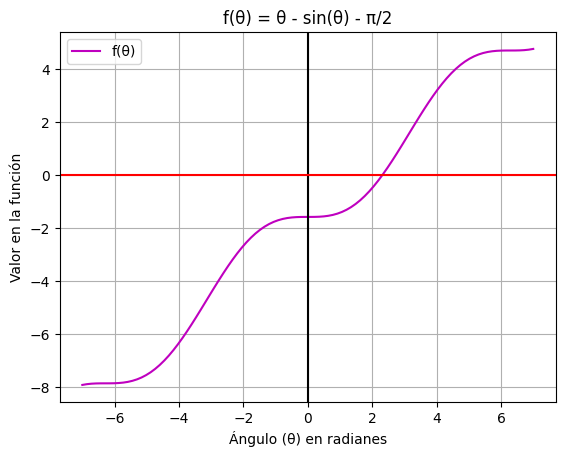

In [ ]:
plt.plot(angle, curve, 'm-', label="f(θ)")
plt.axvline(0, color="black")
plt.axhline(0, color="red")
plt.title("f(θ) = θ - sin(θ) - π/2")
plt.xlabel("Ángulo (θ) en radianes")
plt.ylabel("Valor en la función")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
root_bis = bisect(fl, 1, 3)
root_bis

2.309881460010729

In [ ]:
x1 = np.linspace(-7,7,100)
y1 = gl(x1)

h = lambda x: x
x2 = np.linspace(-7,7,100)
y2 = h(x2)

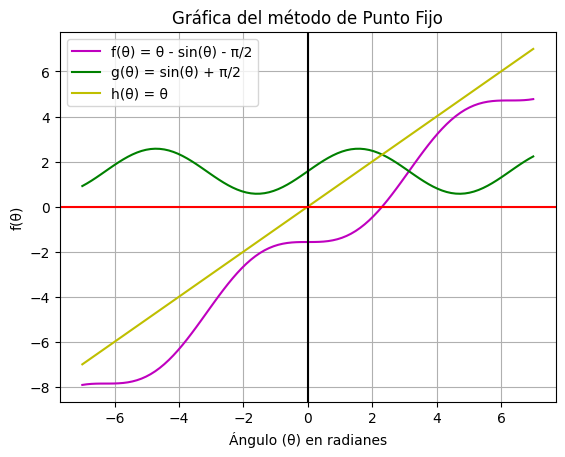

In [ ]:
plt.plot(angle, curve, 'm-', label="f(θ) = θ - sin(θ) - π/2")
plt.plot(x1,y1, 'g-', label='g(θ) = sin(θ) + π/2')
plt.plot(x2,y2, 'y-', label='h(θ) = θ')
plt.axvline(0, color="black")
plt.axhline(0, color="red")
plt.title("Gráfica del método de Punto Fijo")
plt.xlabel("Ángulo (θ) en radianes")
plt.ylabel("f(θ)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
root_fixed = np.float64(fixed_point(gl, 2.3))
root_fixed

2.3098814600100575

In [ ]:
root_newton_sp = newton(fl, 2, df)
root_newton_sp

2.3098814600100575

In [ ]:
root_sec_sp = newton(fl,2)
root_sec_sp

2.309881460010033

Para determinar el punto que más se acercaba la raíz en la gráfica, se llamó en el dataframe **circunferencia** por medio de un ciclo **for** al valor de x cuya imagen fuera menor que un cierta escala ($10^{-2}$).

Así, el programa buscó la posición de este valor, el cual se llamó y se visualizó el valor para el cual $f(x) \approx 0$, siendo $x = 2.333333333333332$.

Al analizar la función por los métodos de bisección, punto fijo, secante y newton se obtuvieron resultados cercanos.

# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


# **A. Encontrar $E$ para el 1 de abril de 1986**

In [10]:
def date2years(yy, mm, dd):
  y = yy + mm/12 + dd/365.25
  return y

In [11]:
start = 1986.1113
period = 75.960000
e = 0.9672671

In [12]:
date1 = date2years(1986, 4, 1)
print("La siguiente fecha corresponde al 1° de abril de 1986:")
print(date1)

La siguiente fecha corresponde al 1° de abril de 1986:
1986.3360711841203


In [13]:
def kepler_equation(to,T,e,t1):
  #t = np.linspace(to, t1, 100)
  E = np.linspace(0,1, 101)
  M_prime = (2*np.pi*(t1-to))/(T)
  real_M = ajuste_angulo(M_prime)
  f = np.zeros(len(E))
  for i in range(len(E)):
    f[i] = E[i] - e*np.sin(E[i]) - real_M
  return f, E, real_M

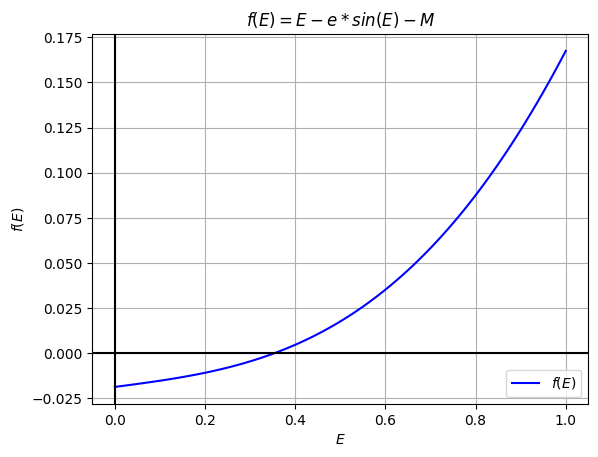

In [14]:
F, E, M = kepler_equation(start,period,0.9672671,date1)

plt.plot(E,F, 'b-', label='$f(E)$')
plt.title('$f(E) = E - e*sin(E) - M$')
plt.xlabel('$E$')
plt.ylabel('$f(E)$')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

In [15]:
f_E = lambda E: E - e*np.sin(E) - M

In [16]:
root_E_sec = newton(f_E, 0.4)
root_E_sec

0.35289765951765534

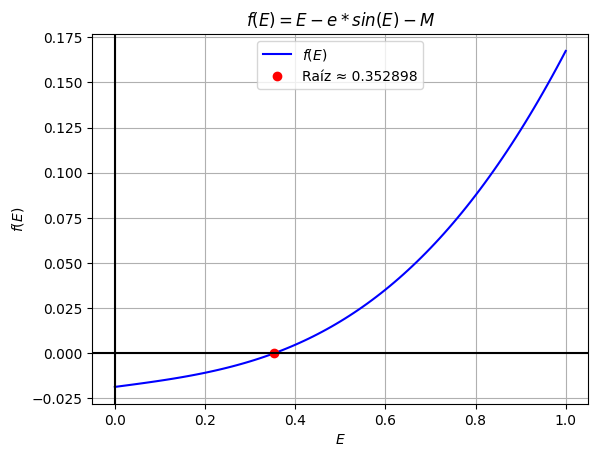

In [17]:
plt.plot(E,F, 'b-', label='$f(E)$')
plt.plot(root_E_sec, 0, 'ro', label=f'Raíz ≈ {round(root_E_sec, 6)}')
plt.title('$f(E) = E - e*sin(E) - M$')
plt.xlabel('$E$')
plt.ylabel('$f(E)$')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

# **B. Graficar $E = E(t)$ para un período $(T)$ de revolución.**

In [18]:
fin = start + period
delta_t = np.arange(start, start+period, period/100)
delta_t

array([1986.1113, 1986.8709, 1987.6305, 1988.3901, 1989.1497, 1989.9093,
       1990.6689, 1991.4285, 1992.1881, 1992.9477, 1993.7073, 1994.4669,
       1995.2265, 1995.9861, 1996.7457, 1997.5053, 1998.2649, 1999.0245,
       1999.7841, 2000.5437, 2001.3033, 2002.0629, 2002.8225, 2003.5821,
       2004.3417, 2005.1013, 2005.8609, 2006.6205, 2007.3801, 2008.1397,
       2008.8993, 2009.6589, 2010.4185, 2011.1781, 2011.9377, 2012.6973,
       2013.4569, 2014.2165, 2014.9761, 2015.7357, 2016.4953, 2017.2549,
       2018.0145, 2018.7741, 2019.5337, 2020.2933, 2021.0529, 2021.8125,
       2022.5721, 2023.3317, 2024.0913, 2024.8509, 2025.6105, 2026.3701,
       2027.1297, 2027.8893, 2028.6489, 2029.4085, 2030.1681, 2030.9277,
       2031.6873, 2032.4469, 2033.2065, 2033.9661, 2034.7257, 2035.4853,
       2036.2449, 2037.0045, 2037.7641, 2038.5237, 2039.2833, 2040.0429,
       2040.8025, 2041.5621, 2042.3217, 2043.0813, 2043.8409, 2044.6005,
       2045.3601, 2046.1197, 2046.8793, 2047.6389, 

In [31]:
def M(t0, T, t):
  M_ = 2*np.pi/T *(t-t0)
  return M_
def kepler(ex, mean):
  return lambda E: E - ex*np.sin(E) - mean

E = sp.symbols('E')

Mt = M(start, period, delta_t)

#Aquí para el método de Newton
kepler_sp = E - e*sp.sin(E)

kepler_dev = sp.diff(kepler_sp, E)
print(kepler_dev)
kepler_dev_l = sp.lambdify(E, kepler_dev)

1 - 0.9672671*cos(E)


In [32]:
Mt = M(start, period, delta_t)

raices_sec = np.zeros(len(delta_t))

for i in range(len(delta_t)):
  raices_sec[i] = newton(kepler(e,Mt[i]), 0.5)

In [36]:
#raices_n = np.zeros(len(delta_t))
#for i in range(len(delta_t)):
  #raices_n[i] = newton(kepler(e,Mt[i]), 0.5, kepler_dev_l)
#print(raices_n)

Para este caso, el método de Newton no resulta en convergencia. Si se quiere revisar, se puede activar la anterior celda.

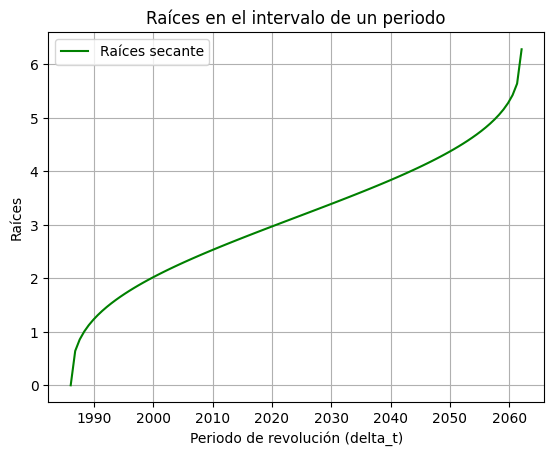

In [22]:
plt.plot(delta_t, raices_sec, 'g-', label='Raíces secante')
plt.title("Raíces en el intervalo de un periodo")
plt.xlabel("Periodo de revolución (delta_t)")
plt.ylabel('Raíces')
plt.legend()
plt.grid()
plt.show()

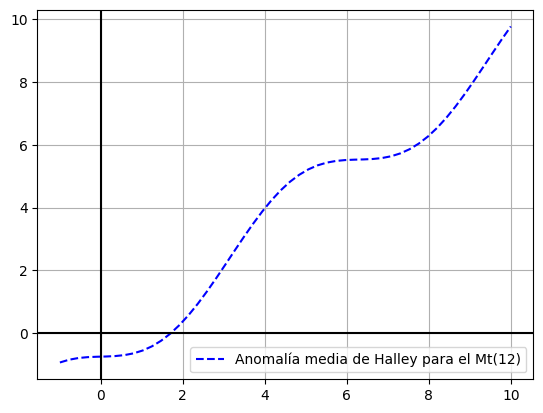

In [23]:
n = 12
Kr = kepler(e, Mt[n])
En = np.linspace(-1,10)

plt.plot(En, Kr(En), 'b--', label=f'Anomalía media de Halley para el Mt({n})')
plt.legend()
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid()
plt.show()

In [24]:
def mean_anomaly(to,T,variation_t):
  M = np.zeros(len(variation_t))
  for i in range(len(variation_t)):
    M_prime = (2*np.pi*(variation_t[i]-to))/(T)
    real_M = ajuste_angulo(M_prime)
    M[i] = real_M
  return M

In [25]:
M_halley = mean_anomaly(start,period, delta_t)
print(M_halley)
E_values = np.linspace(0,1, len(M_halley))
#E_values

[0.00000000e+00 6.28318531e-02 1.25663706e-01 1.88495559e-01
 2.51327412e-01 3.14159265e-01 3.76991118e-01 4.39822972e-01
 5.02654825e-01 5.65486678e-01 6.28318531e-01 6.91150384e-01
 7.53982237e-01 8.16814090e-01 8.79645943e-01 9.42477796e-01
 1.00530965e+00 1.06814150e+00 1.13097336e+00 1.19380521e+00
 1.25663706e+00 1.31946891e+00 1.38230077e+00 1.44513262e+00
 1.50796447e+00 1.57079633e+00 1.63362818e+00 1.69646003e+00
 1.75929189e+00 1.82212374e+00 1.88495559e+00 1.94778745e+00
 2.01061930e+00 2.07345115e+00 2.13628300e+00 2.19911486e+00
 2.26194671e+00 2.32477856e+00 2.38761042e+00 2.45044227e+00
 2.51327412e+00 2.57610598e+00 2.63893783e+00 2.70176968e+00
 2.76460154e+00 2.82743339e+00 2.89026524e+00 2.95309709e+00
 3.01592895e+00 3.07876080e+00 3.14159265e+00 3.20442451e+00
 3.26725636e+00 3.33008821e+00 3.39292007e+00 3.45575192e+00
 3.51858377e+00 3.58141563e+00 3.64424748e+00 3.70707933e+00
 3.76991118e+00 3.83274304e+00 3.89557489e+00 3.95840674e+00
 4.02123860e+00 4.084070

In [26]:
def f(val_E, eccentrity, Mean_anomaly):
  fE = val_E - eccentrity*np.sin(val_E) - Mean_anomaly
  return fE

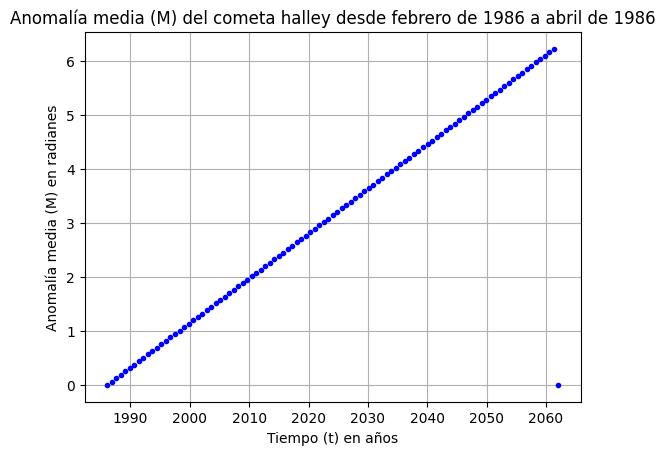

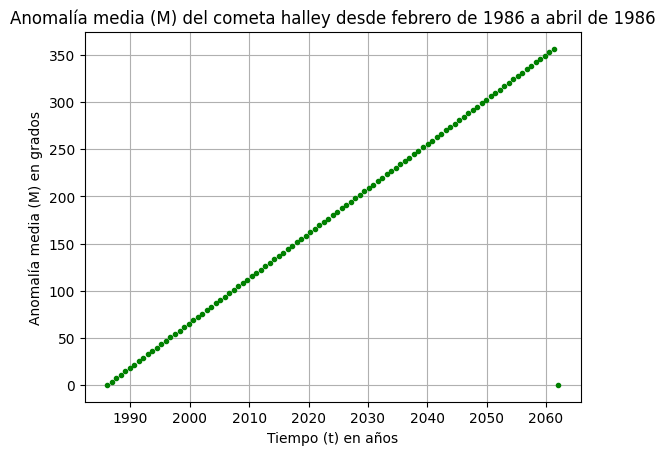

Estas gráficas muestran el ángulo barrido por el cometa Halley en su órbita alrededor del Sol,
          la primera (puntos azules) en radianes y la segunda (puntos verdes) en grados sexagesimales.


In [27]:
plt.plot(delta_t, M_halley, 'b.', label="M")
plt.title(f"Anomalía media (M) del cometa halley desde febrero de 1986 a abril de 1986")
plt.xlabel("Tiempo (t) en años")
plt.ylabel("Anomalía media (M) en radianes")
plt.grid()
plt.show()

plt.plot(delta_t, np.rad2deg(M_halley), 'g.', label="M")
plt.title(f"Anomalía media (M) del cometa halley desde febrero de 1986 a abril de 1986")
plt.xlabel("Tiempo (t) en años")
plt.ylabel("Anomalía media (M) en grados")
plt.grid()
plt.show()

print("""Estas gráficas muestran el ángulo barrido por el cometa Halley en su órbita alrededor del Sol,
          la primera (puntos azules) en radianes y la segunda (puntos verdes) en grados sexagesimales.""")

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

#**A. Cálculo por los métodos de Newton-Raphson y la secante.**

In [ ]:
m = sp.symbols('m')
M = sp.tanh(m/0.5) - m
print(M)

Ml = sp.lambdify(m ,M)
mag = np.linspace(-2,2, 100)
M_T = Ml(mag)

-m + tanh(2.0*m)


In [ ]:
dM = sp.diff(M, m)
dMl = sp.lambdify(m, dM)

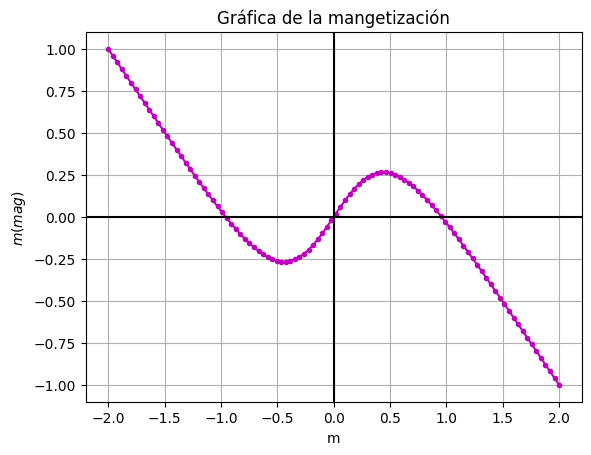

In [ ]:
plt.plot(mag, M_T, 'm.-', label="m(mag)")
plt.title("Gráfica de la mangetización")
plt.xlabel("m")
plt.ylabel("$m(mag)$")
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.grid()
plt.show()

Por el método de Newton-Raphson:

In [ ]:
r1_n= newton(Ml, 1, dMl)
root1_n = round(r1_n, 4)
print(root1_n)

0.9575


In [ ]:
r2_n = newton(Ml, -1, dMl)
root2_n = round(r2_n, 4)
print(root2_n)

-0.9575


In [ ]:
r0_n = newton(Ml, 0, dMl)
r0_n

0.0

Por el método de la secante:

In [ ]:
r1_s = newton(Ml, 1)
root1_sec = round(r1_s, 4)
root1_sec

0.9575

In [ ]:
r2_s = newton(Ml, -1)
root2_sec = round(r2_s, 4)
root2_sec

-0.9575

In [ ]:
r0_s = newton(Ml, 0)
r0_s

0.0

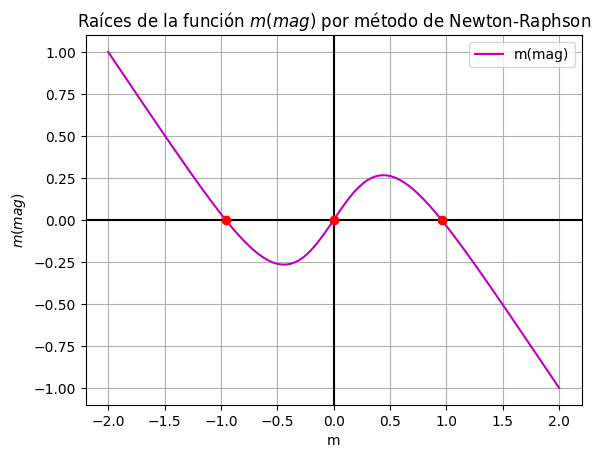

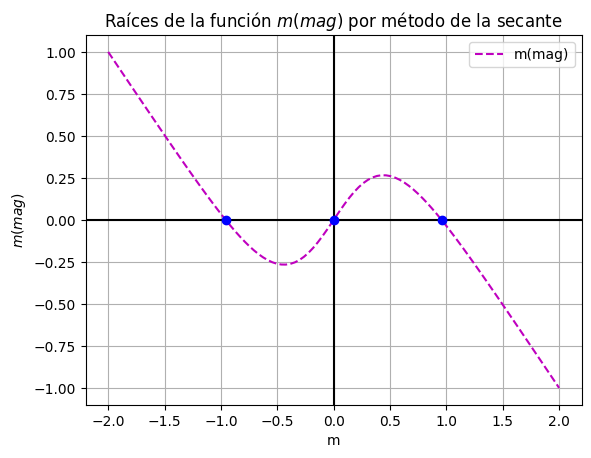

In [ ]:
plt.plot(mag, M_T, 'm-', label="m(mag)")
plt.title("Raíces de la función $m(mag)$ por método de Newton-Raphson")
plt.legend()
plt.xlabel("m")
plt.ylabel("$m(mag)$")
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.plot(r0_n, 0, 'ro')
plt.plot(r1_n, 0, 'ro')
plt.plot(r2_n, 0, 'ro')
plt.grid()
plt.show()

plt.plot(mag, M_T, 'm--', label="m(mag)")
plt.title("Raíces de la función $m(mag)$ por método de la secante")
plt.legend()
plt.xlabel("m")
plt.ylabel("$m(mag)$")
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.plot(r0_s, 0, 'bo')
plt.plot(r1_s, 0, 'bo')
plt.plot(r2_s, 0, 'bo')
plt.grid()
plt.show()

**Cálculo por el método de Punto Fijo.**

In [ ]:
g = sp.tanh(m/0.5)
gl = sp.lambdify(m, g)
G = gl(mag)

h = m
hl = sp.lambdify(m, h)
H = hl(mag)

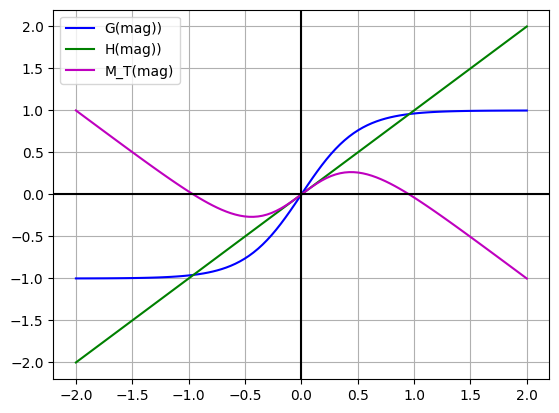

In [ ]:
plt.plot(mag, G, "b-", label="G(mag))")
plt.plot(mag, H, "g-", label="H(mag))")
plt.plot(mag, M_T, 'm-', label="M_T(mag)")
plt.legend()
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.grid()
plt.show()

In [ ]:
fxd_root0 = np.float64(fixed_point(gl, 0))
fxd_root0

0.0

In [ ]:
fxd_root1 = np.float64(fixed_point(gl, -1))
fxd_root1

-0.9575040240772689

In [ ]:
fxd_root2 = np.float64(fixed_point(gl, 1))
fxd_root2

0.9575040240772689

# **B. Temperatura variable**

In [ ]:
temp = np.linspace(0.1, 0.99, 100)

def magnetizacion(m, T):
  return lambda m: m - np.tanh(m/T)

#Variamos T y nos movemos alrededor de m=-1
raices_a = np.zeros(len(temp))
for i in range(len(temp)):
  raices_a[i] = newton(magnetizacion(mag,temp[i]),-1)

#Variamos T y nos movemos alrededor de m = 0
raices_b = np.zeros(len(temp))
for i in range(len(temp)):
  raices_b[i] = newton(magnetizacion(mag,temp[i]),0)

#Variamos T y nos movemos alrededor de m =1
raices_c = np.zeros(len(temp))
for i in range(len(temp)):
  raices_c[i] = newton(magnetizacion(mag,temp[i]),1)

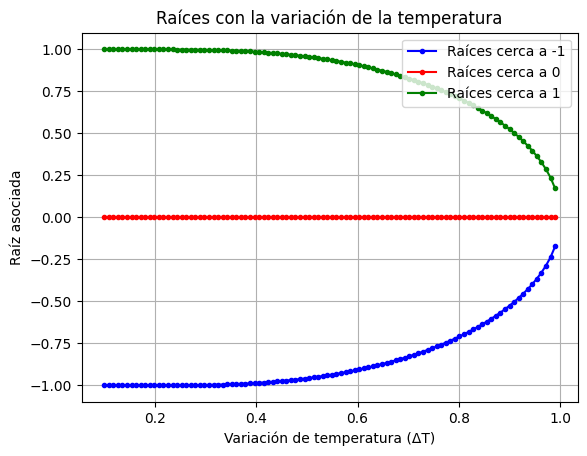

In [ ]:
plt.plot(temp, raices_a, 'b.-', label='Raíces cerca a -1')
plt.plot(temp, raices_b, 'r.-', label='Raíces cerca a 0')
plt.plot(temp, raices_c, 'g.-', label='Raíces cerca a 1')
plt.title('Raíces con la variación de la temperatura')
plt.legend()
plt.xlabel('Variación de temperatura (ΔT)')
plt.ylabel('Raíz asociada')
plt.grid()
plt.show()